## IMPORTS ET PREPARATION DES DONNÉES

In [47]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import spacy
import nltk

In [48]:
#data = pd.read_csv("../ETL/output_file.csv")
data = pd.read_csv("../training_and_graph_data/formation_quels_conseils_pourriez-vous_d.csv")
question = data.columns[1]
data["formated"] = data[question] 
formation = "toutes"

[OPTIONEL] Sélectionner une formation

In [49]:
# select only with raw with a formation = Informatique et Gestion (IG)

formation = "STE"
data = data[data["formation"].str.contains(formation)]


In [50]:
# remove rows with answer len <= 1
data = data[data["formated"].str.len() > 1]

[OPTIONEL] Enlever les stops words

In [5]:
# remove stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('french')
data['formated'] = data[data.columns[1]].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop)]))
# remove row with empty text
data = data[data.formated != '']


[nltk_data] Downloading package stopwords to /home/remi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Overview data

In [51]:
print("taille du dataset : ", data.shape[0])
display(data.head())

taille du dataset :  292


,formation,quels conseils pourriez-vous donner aux etudiants actuellement en formation pour bien choisir leur stage de fin d'etude ? reussir leur insertion professionnelle ?,formated
31,Sciences et Technologies de l'Eau (STE),Choisir un stage de fin d'etude en accord avec...,Choisir un stage de fin d'etude en accord avec...
32,Sciences et Technologies de l'Eau (STE),Essayer de definir le plus rapidement possible...,Essayer de definir le plus rapidement possible...
33,Sciences et Technologies de l'Eau (STE),Avoir un maximum d'experiences differentes ent...,Avoir un maximum d'experiences differentes ent...
34,Sciences et Technologies de l'Eau (STE),Ne pas se precipiter Ne pas forcement privile...,Ne pas se precipiter Ne pas forcement privile...
35,Sciences et Technologies de l'Eau (STE),Reflechir a long terme sur leur souhait de par...,Reflechir a long terme sur leur souhait de par...


In [52]:
print(data["formation"].unique())

["Sciences et Technologies de l'Eau (STE)"]


## Create embedding

Création de l'embedding, pour cette étape l'objectif est de convertir nos données du texte en vecteur

Si necessaire installer la bibliothèque contenant le réseau de neuronne de conversion. Ici c'est la version française de spacy et la version small (sm) pour des vecteurs avec 96 dimensions.

In [ ]:
python -m spacy download fr_core_news_sm

In [5]:
python -m spacy download fr_core_news_lg

SyntaxError: invalid syntax (555220813.py, line 1)

In [29]:
nlp = spacy.load("fr_core_news_lg")

On ajoute une colonne dans le dataframe contenant les vecteurs associés à chaque phrase.

In [53]:
# add a column vector in data with each sentence convert into a vector with spacy

data["vector"] = data["formated"].apply(lambda x: nlp(x).vector)

display(data.head())

,formation,quels conseils pourriez-vous donner aux etudiants actuellement en formation pour bien choisir leur stage de fin d'etude ? reussir leur insertion professionnelle ?,formated,vector
31,Sciences et Technologies de l'Eau (STE),Choisir un stage de fin d'etude en accord avec...,Choisir un stage de fin d'etude en accord avec...,"[0.36107782, -1.2093858, -0.5886372, 1.6868063..."
32,Sciences et Technologies de l'Eau (STE),Essayer de definir le plus rapidement possible...,Essayer de definir le plus rapidement possible...,"[0.6264571, -1.5708176, -1.0909253, 1.4343529,..."
33,Sciences et Technologies de l'Eau (STE),Avoir un maximum d'experiences differentes ent...,Avoir un maximum d'experiences differentes ent...,"[0.5073969, -1.8756814, -2.5734415, 1.6524725,..."
34,Sciences et Technologies de l'Eau (STE),Ne pas se precipiter Ne pas forcement privile...,Ne pas se precipiter Ne pas forcement privile...,"[1.4523771, -2.9118702, -3.0894237, -0.4332909..."
35,Sciences et Technologies de l'Eau (STE),Reflechir a long terme sur leur souhait de par...,Reflechir a long terme sur leur souhait de par...,"[0.29011512, -0.5129944, -1.3231556, 1.5064769..."


Présentation des résulats de l'embedding.

[array([ 3.6107782e-01, -1.2093858e+00, -5.8863717e-01,  1.6868063e+00,
       -2.3786581e+00,  1.2007254e+00, -1.0603421e+00,  9.3772072e-01,
        1.1391908e+00,  1.0683477e+00, -6.3580000e-01,  4.9683717e-01,
       -1.2147276e+00, -2.2880492e+00,  1.0809170e+00, -3.1145927e-01,
        2.1454735e+00,  9.7267133e-01,  1.0882041e+00, -8.7270021e-01,
       -1.5897786e-02,  6.0966498e-01, -8.1622824e-02, -7.2304286e-02,
       -1.7649206e+00,  6.2056410e-01, -3.4166136e-01,  1.5961422e+00,
        5.8305138e-01,  1.1000358e+00, -4.4246143e-01, -4.8776489e-01,
       -1.4178590e+00,  6.4726293e-01,  5.4094720e-01, -7.3480912e-02,
        4.2953342e-01,  3.9116868e-01,  8.4399712e-01,  4.9066645e-01,
        1.0156692e+00, -1.2304751e+00, -1.0539893e+00, -9.9066550e-01,
       -7.8885365e-01,  1.6381044e+00,  5.8040875e-01,  1.7226273e+00,
       -6.8573427e-01,  1.4919697e-01, -7.0116359e-01, -4.3213496e-01,
        1.0645258e+00,  2.7267927e-01,  2.0360229e+00, -8.0373365e-01,
     

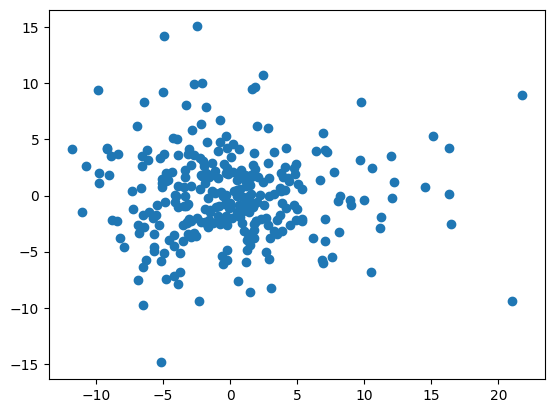

In [54]:
# plot embedding with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
print(data["vector"].tolist())
print(min([len(x) for x in data["vector"].tolist()]))
result_pca = pca.fit_transform(data["vector"].tolist())
x = result_pca[:, 0]
y = result_pca[:, 1]

plt.scatter(x, y)
plt.show()


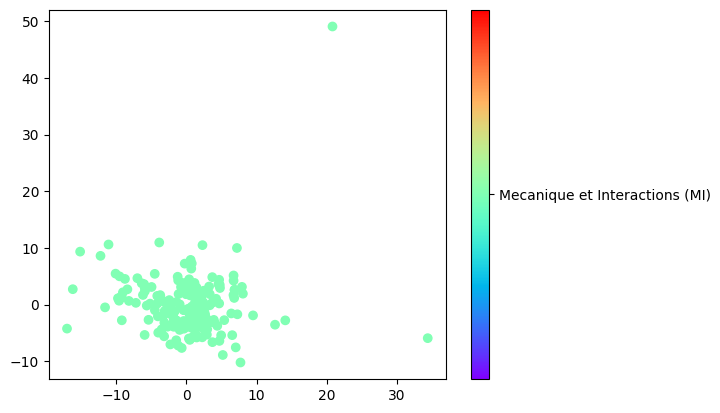

In [10]:
# plot embedding with PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

pca = PCA(n_components=2)
result_pca = pca.fit_transform(data["vector"].tolist())
x = result_pca[:, 0]
y = result_pca[:, 1]

label_encoder = LabelEncoder()
colors_numerical = label_encoder.fit_transform(data["formation"])

plt.scatter(x, y, c=colors_numerical, cmap="rainbow")

cbar = plt.colorbar(ticks=range(len(label_encoder.classes_)))
cbar.set_ticklabels(label_encoder.classes_)

plt.show()

## KMEANS

### Quels paramètres ?

In [57]:
from sklearn.metrics import silhouette_score
from kmeans import calculate_kmeans

NUMBER_OF_CLUSTERS = 7
SEED = 22
embeddings = data["vector"].tolist()

kmeans, clusters = calculate_kmeans(embeddings, NUMBER_OF_CLUSTERS, SEED)

print(silhouette_score(data["vector"].tolist(), clusters))

/home/remi/Documents/IG4/S7/data_science/data_science_backend/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.090839684


/home/remi/Documents/IG4/S7/data_science/data_science_backend/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/remi/Documents/IG4/S7/data_science/data_science_backend/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/remi/Documents/IG4/S7/data_science/data_science_backend/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/remi/Document

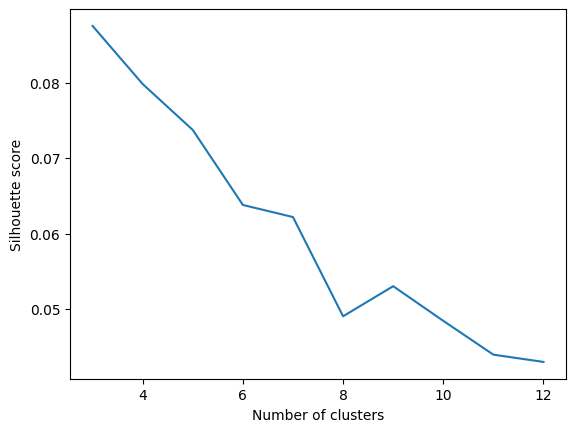

In [55]:
# plot the silhouette score for different number of clusters
from sklearn.metrics import silhouette_score
from kmeans import calculate_kmeans

MIN_NUMBER_OF_CLUSTERS = 3
MAX_NUMBER_OF_CLUSTERS = 12
number_of_repeats = 3
embeddings = data["vector"].tolist()

silhouette_scores = []
for number_of_clusters in range(MIN_NUMBER_OF_CLUSTERS, MAX_NUMBER_OF_CLUSTERS+1):
    silhouette_scores_for_current_number_of_clusters = []
    for seed in range(number_of_repeats):
        kmeans, clusters = calculate_kmeans(embeddings, number_of_clusters, seed)
        silhouette_scores_for_current_number_of_clusters.append(silhouette_score(embeddings, clusters))
    silhouette_scores.append(np.mean(silhouette_scores_for_current_number_of_clusters))
    
plt.plot(range(MIN_NUMBER_OF_CLUSTERS, MAX_NUMBER_OF_CLUSTERS+1), silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

/home/remi/Documents/IG4/S7/data_science/data_science_backend/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/remi/Documents/IG4/S7/data_science/data_science_backend/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/remi/Documents/IG4/S7/data_science/data_science_backend/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/remi/Document

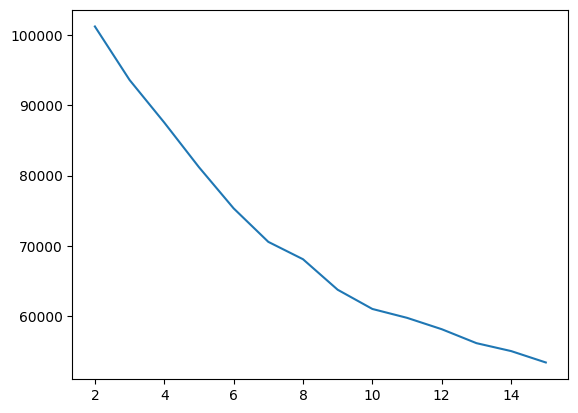

In [59]:
# elbow method
from sklearn.cluster import KMeans

MIN_NUMBER_OF_CLUSTERS = 2
MAX_NUMBER_OF_CLUSTERS = 15
number_of_repeats = 5

embeddings = data["vector"].tolist()
inertia = []
for number_of_clusters in range(MIN_NUMBER_OF_CLUSTERS, MAX_NUMBER_OF_CLUSTERS+1):
    inertia_for_current_number_of_clusters = []
    for _ in range(number_of_repeats):
        kmeans = KMeans(n_clusters=number_of_clusters, random_state=SEED).fit(embeddings)
        inertia_for_current_number_of_clusters.append(kmeans.inertia_)
    inertia.append(np.mean(inertia_for_current_number_of_clusters))
    
plt.plot(range(MIN_NUMBER_OF_CLUSTERS, MAX_NUMBER_OF_CLUSTERS+1), inertia)


/home/remi/Documents/IG4/S7/data_science/data_science_backend/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/remi/Documents/IG4/S7/data_science/data_science_backend/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/remi/Documents/IG4/S7/data_science/data_science_backend/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/remi/Document

Best seed: 22


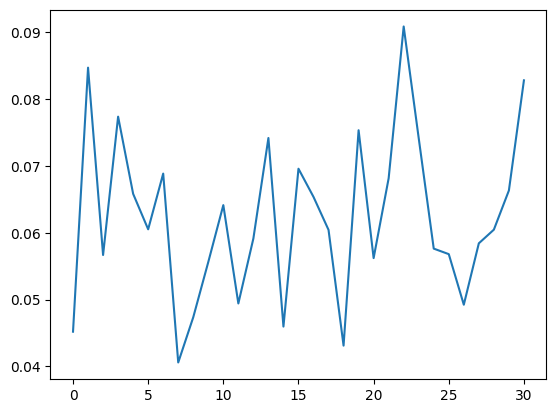

In [56]:
# test plusieurs seed
from sklearn.metrics import silhouette_score

NUMBER_OF_CLUSTERS = 7
MIN_SEED = 0
MAX_SEED = 30
embeddings = data["vector"].tolist()

max, max_seed = 0, 0
silhouette_scores = []
for seed in range(MIN_SEED, MAX_SEED+1):
    kmeans, clusters = calculate_kmeans(embeddings, NUMBER_OF_CLUSTERS, seed)
    silhouette_scores.append(silhouette_score(embeddings, clusters))
    if silhouette_scores[-1] > max:
        max = silhouette_scores[-1]
        max_seed = seed
print("Best seed:", max_seed)

plt.plot(range(MIN_SEED, MAX_SEED+1), silhouette_scores)



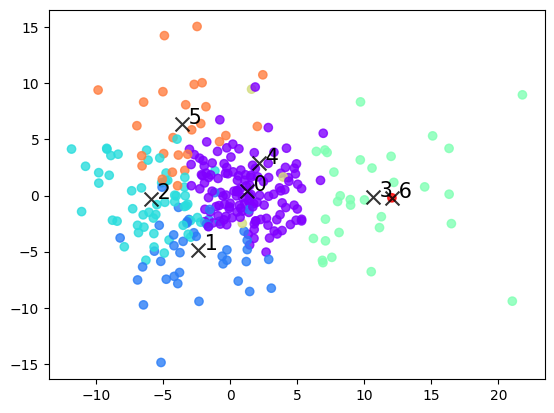

In [58]:
# plot kmeans
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

result_pca2d = pca.fit_transform(data["vector"].tolist())
center_pca2d = pca.transform(kmeans.cluster_centers_)

x = result_pca2d[:, 0]
y = result_pca2d[:, 1]

plt.scatter(x, y, alpha=0.8, c=clusters, cmap="rainbow")
plt.scatter(center_pca2d[:, 0], center_pca2d[:, 1], c="black", s=100, alpha=0.8, marker="x")
for i, center in enumerate(center_pca2d):
    plt.annotate(" "+str(i), center, fontsize=15)

plt.show()



/home/remi/Documents/IG4/S7/data_science/data_science_backend/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


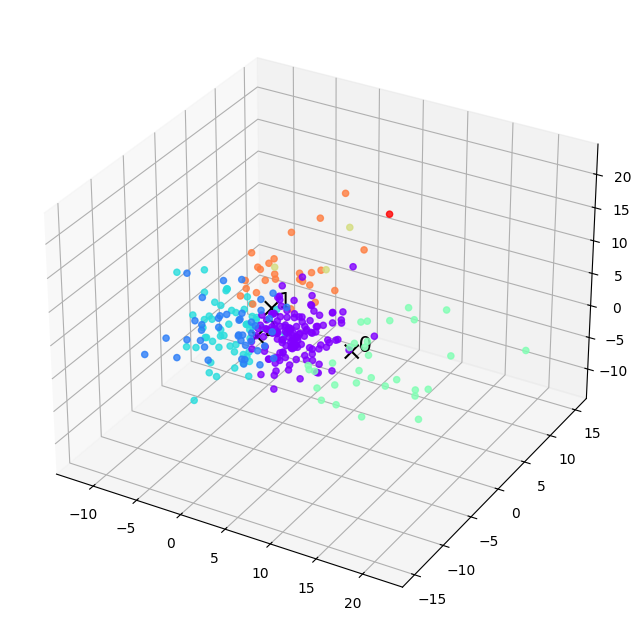

In [59]:
from sklearn.cluster import KMeans
import time

kmeans = KMeans(n_clusters=3).fit(data["vector"].tolist())

# plot kmeans
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

result_pca = pca.fit_transform(data["vector"].tolist())
center_pca = pca.transform(kmeans.cluster_centers_)


x = result_pca[:, 0]
y = result_pca[:, 1]
z = result_pca[:, 2]

# plot 3D
plt.figure(figsize=(8, 8))
ax = plt.axes(projection="3d")
ax.scatter3D(x, y, z, c=clusters, cmap="rainbow", alpha=0.8)
ax.scatter3D(center_pca[:, 0], center_pca[:, 1], center_pca[:, 2], c="black", s=100, alpha=1, marker="x")
for i, center in enumerate(center_pca):
    ax.text(center[0], center[1], center[2], " "+str(i), fontsize=15)
plt.show()

In [60]:
# add a column cluster in data
data["cluster"] = clusters
display(data.head(10))

,formation,quels conseils pourriez-vous donner aux etudiants actuellement en formation pour bien choisir leur stage de fin d'etude ? reussir leur insertion professionnelle ?,formated,vector,cluster
31,Sciences et Technologies de l'Eau (STE),Choisir un stage de fin d'etude en accord avec...,Choisir un stage de fin d'etude en accord avec...,"[0.36107782, -1.2093858, -0.5886372, 1.6868063...",2
32,Sciences et Technologies de l'Eau (STE),Essayer de definir le plus rapidement possible...,Essayer de definir le plus rapidement possible...,"[0.6264571, -1.5708176, -1.0909253, 1.4343529,...",2
33,Sciences et Technologies de l'Eau (STE),Avoir un maximum d'experiences differentes ent...,Avoir un maximum d'experiences differentes ent...,"[0.5073969, -1.8756814, -2.5734415, 1.6524725,...",5
34,Sciences et Technologies de l'Eau (STE),Ne pas se precipiter Ne pas forcement privile...,Ne pas se precipiter Ne pas forcement privile...,"[1.4523771, -2.9118702, -3.0894237, -0.4332909...",3
35,Sciences et Technologies de l'Eau (STE),Reflechir a long terme sur leur souhait de par...,Reflechir a long terme sur leur souhait de par...,"[0.29011512, -0.5129944, -1.3231556, 1.5064769...",1
36,Sciences et Technologies de l'Eau (STE),Choisir un stage avec une grande possibilite d...,Choisir un stage avec une grande possibilite d...,"[-0.6484994, -0.4377882, -1.5192249, 2.1374788...",2
37,Sciences et Technologies de l'Eau (STE),Le stage de fin d'etude doit etre choisi prior...,Le stage de fin d'etude doit etre choisi prior...,"[-0.43456048, -0.5154297, -0.94772476, 1.52507...",2
92,Sciences et Technologies de l'Eau (STE),Le stage de fin d'etudes est determinant pour ...,Le stage de fin d'etudes est determinant pour ...,"[-0.33265063, 0.17902091, -0.7570142, 2.274712...",2
93,Sciences et Technologies de l'Eau (STE),Des les premieres annees orienter l'ensemble d...,Des les premieres annees orienter l'ensemble d...,"[-0.10377109, -1.3637934, -1.8600372, 1.366781...",1
94,Sciences et Technologies de l'Eau (STE),Choisir un stage ou un reel projet est propose...,Choisir un stage ou un reel projet est propose...,"[-0.13654293, -1.6133169, -2.6415288, 1.701784...",5


In [61]:
# dislay each cluster
for cluster in np.unique(clusters):
    print(f"cluster {cluster}, size {len(data[data['cluster'] == cluster])}")
    display(data[data["cluster"] == cluster]["formated"].head(5))
    print("\n\n")

cluster 0, size 134


95     Etre curieux  Bien anticiper la reflexion pour...
96     La formation est pluridisciplinaire et choisis...
99     Pour bien choisir le stage de fin d'etude il f...
100    De bien reflechir a ce qu'il souhaite faire ap...
102    Ne pas se focaliser sur l'apres stage et 'est-...
Name: formated, dtype: object




cluster 1, size 43


35     Reflechir a long terme sur leur souhait de par...
93     Des les premieres annees orienter l'ensemble d...
97     Aller chercher dans le catalogue des anciens e...
98     Elargir leur reseau professionnel aupres des a...
111    Renseignez-vous bien en avance prenez contact ...
Name: formated, dtype: object




cluster 2, size 54


31    Choisir un stage de fin d'etude en accord avec...
32    Essayer de definir le plus rapidement possible...
36    Choisir un stage avec une grande possibilite d...
37    Le stage de fin d'etude doit etre choisi prior...
92    Le stage de fin d'etudes est determinant pour ...
Name: formated, dtype: object




cluster 3, size 31


34     Ne pas se precipiter  Ne pas forcement privile...
101                              S'y prendre a l'avance 
121                           Faites ce qu'il vous plait
154    Que l'on sache ou non ce que l'on veut faire e...
202    d'etre vigilent de ne pas se laisser marcher d...
Name: formated, dtype: object




cluster 4, size 3


340                                                Aucun
885    S'AIDER DES ANCIENS POUR TROUVER UN STAGE QUI ...
998    FAIRE CE QUI LEUR PLAIT Ne pas choisir un stag...
Name: formated, dtype: object




cluster 5, size 26


33     Avoir un maximum d'experiences differentes ent...
94     Choisir un stage ou un reel projet est propose...
186    Trouver un stage en adequation avec leur proje...
463    1) Le sujet de stage doit etre en coherence av...
512    De choisir un bureau d'etudes pour avoir un mi...
Name: formated, dtype: object




cluster 6, size 1


1965    Courage !!
Name: formated, dtype: object

## Descript the cluster

In [62]:
# take all text for one cluster in data and put it in a list
cluster_0 = data[data["cluster"] == 3][data.columns[1]].tolist()
print(cluster_0)

['Ne pas se precipiter  Ne pas forcement privilegier le salaire aux missions proposees  Faire ce qui leur plait ', "S'y prendre a l'avance ", "Faites ce qu'il vous plait", "Que l'on sache ou non ce que l'on veut faire essayer si possible tous les domaines proposes.", "d'etre vigilent de ne pas se laisser marcher dessus et de ne pas baisser les bras !", "etre tres actif dans la recherche d'emploi ne pas hesiter a contacter les entreprises ne negliger aucun entretien professionnel ne pas se decourager bien definir son projet professionnel grace notamment aux stages.", 'Commencer les recherches rapidement et ne pas hesiter a aller deposer des CV en personne !', "S'y prendre en avance. Ne pas se decourager si une opportunite vous passe sous le nez c'est qu'elle n'etait pas fate pour vous. Ne pas se devaloriser. Choisir un domaine qui nous plait et pas par defaut de mieux.", 'Ne pas se restreindre geographiquement', "De pas s'en faire un monde c'est pas ce stage qui conditionnera neccessair

In [63]:
data_content = {}

for cluster in np.unique(clusters):
    data_content[cluster] = data[data["cluster"] == cluster][data.columns[1]].tolist()[:20]

print(data_content)

{0: ["Etre curieux  Bien anticiper la reflexion pour le stage de fin d'etudes En stage etre curieux et bien s'integrer a l'equipe meme si la place de stagiaire est parfois difficile (le savoir-etre est souvent plus important que vos connaissances qui sont a peu pres les memes que les autres candidats)", 'La formation est pluridisciplinaire et choisissez bien votre stage au risque de vous enfermer dans une branche qui ne vous correspond pas forcement.', "Pour bien choisir le stage de fin d'etude il faut regarder en premier les retours d'experience des anciens diplomes dans les entreprises. Ensuite regarder quelles entreprises embauchent a l'issue du stage et se focaliser sur ces dernieres. il est tres complique par la suite d'entrer dans les 'grandes' boites sans y avoir fait un stage.  Commencer a chercher au moins 3 mois avant la fin du stage de fin d'etude ne pas hesiter a faire des candidatures spontanees et contacter directement les recruteurs sur linkedin et bien sur se mettre en 

In [41]:
prompt = f"""
Trouve un titre et une courte description en français qui décrit le tableau data au mieux.
data est une liste de commentaire issue d'un seul cluster possédant des points communs.
Met en avant ces points communs dans le titre et la description.
La réponse doit être un json de la forme : """ + "{'title': 'titre trouvé', 'description': 'description trouvée'}" + f"""

data = {cluster_0}"""

print(prompt)


Trouve un titre et une courte description en français qui décrit le tableau data au mieux.
data est une liste de commentaire issue d'un seul cluster possédant des points communs.
Met en avant ces points communs dans le titre et la description.
La réponse doit être un json de la forme : {'title': 'titre trouvé', 'description': 'description trouvée'}

data = ["Choisissez un stage qui vous plait vraiment (secteur d'activite et service au sein duquel vous realiserez votre stage). Il s'agit de votre experience professionnelle la plus importante (en theorie) qui sera presente sur votre CV et qui vous permettra de trouver par la suite le poste que vous souhaitez.   ", "Choisir le stage pour la mission et en aucun cas pour le lieu  Eventuellement choisir un stage moins bien dans une grosse boite peu ouvrir des portes mais la mission et l'epanouissement sont primordial. ca change totalement la vision du metier ", "Choisir un stage ou l'on va etre sur un projet concret epanouissant et permettan

In [65]:
prompt = f"""
Pour chaque cluster présent dans data, trouve un titre et une courte description qui décrit au mieux le cluster.
Chaques clusters est une liste de commentaire possédant des points communs.
Met en avant ces points communs dans le titre et la description tout en mettant en avant les différences entre les clusters.
Les data répondent à la problématique suivante : "{data.columns[1]}"
Ta réponse doit seulement être un json de la forme :""" + """
{ "0": {"title": "titre trouvé", "description": "description trouvée"}, # 0 est le numéro du cluster
  "1": {"title": "titre trouvé", "description": "description trouvée"},
  ... (autant de cluster que de réponse)
}""" + f"""

data = {data_content}"""

print(prompt)
print("taille : ", len(prompt))


Pour chaque cluster présent dans data, trouve un titre et une courte description qui décrit au mieux le cluster.
Chaques clusters est une liste de commentaire possédant des points communs.
Met en avant ces points communs dans le titre et la description tout en mettant en avant les différences entre les clusters.
Les data répondent à la problématique suivante : "quels conseils pourriez-vous donner aux etudiants actuellement en formation pour bien choisir leur stage de fin d'etude ? reussir leur insertion professionnelle ?"
Ta réponse doit seulement être un json de la forme :
{ "0": {"title": "titre trouvé", "description": "description trouvée"}, # 0 est le numéro du cluster
  "1": {"title": "titre trouvé", "description": "description trouvée"},
  ... (autant de cluster que de réponse)
}

data = {0: ["Etre curieux  Bien anticiper la reflexion pour le stage de fin d'etudes En stage etre curieux et bien s'integrer a l'equipe meme si la place de stagiaire est parfois difficile (le savoir-e

In [66]:
import g4f
import re
import json

g4f.debug.logging = True  # Enable debug logging
g4f.debug.version_check = False  # Disable automatic version checking


response_initial = g4f.ChatCompletion.create(
    model=g4f.models.gpt_4,
    messages=[{"role": "user", "content": prompt}],
)  # Alternative model setting

response = response_initial

response = response.replace("\n", "")
response = re.sub(' +', ' ', response)
match = re.search(r'\{.*\}', response)

if match:
    json_string = match.group(0)
    try:
        json_data = json.loads(json_string)
        print(json_data)
    except json.JSONDecodeError as e:
        print("Erreur lors de la conversion JSON :", e)
else:
    print("Aucune correspondance trouvée.")

Using RetryProvider provider and gpt-4 model
Using Bing provider
{'0': {'title': 'Choisir son stage en fonction de ses intérêts et de ses perspectives', 'description': "Ce cluster regroupe des commentaires qui conseillent aux étudiants de choisir leur stage de fin d'études en fonction de ce qui les intéresse, de ce qu'ils veulent faire plus tard, et des opportunités d'embauche. Ils insistent sur l'importance de se renseigner sur les entreprises, les domaines d'activité, et les retours d'expérience des anciens diplômés. Ils encouragent également les étudiants à être curieux, à s'intégrer à l'équipe, et à ne pas se focaliser sur le salaire ou le CDI."}, '1': {'title': 'Utiliser le réseau des anciens élèves et des enseignants', 'description': "Ce cluster regroupe des commentaires qui conseillent aux étudiants de se servir du réseau des anciens élèves et des enseignants pour trouver un stage qui leur correspond. Ils soulignent l'intérêt de contacter les entreprises qui ont déjà accueilli d

In [67]:
json_data

{'0': {'title': 'Choisir son stage en fonction de ses intérêts et de ses perspectives',
  'description': "Ce cluster regroupe des commentaires qui conseillent aux étudiants de choisir leur stage de fin d'études en fonction de ce qui les intéresse, de ce qu'ils veulent faire plus tard, et des opportunités d'embauche. Ils insistent sur l'importance de se renseigner sur les entreprises, les domaines d'activité, et les retours d'expérience des anciens diplômés. Ils encouragent également les étudiants à être curieux, à s'intégrer à l'équipe, et à ne pas se focaliser sur le salaire ou le CDI."},
 '1': {'title': 'Utiliser le réseau des anciens élèves et des enseignants',
  'description': "Ce cluster regroupe des commentaires qui conseillent aux étudiants de se servir du réseau des anciens élèves et des enseignants pour trouver un stage qui leur correspond. Ils soulignent l'intérêt de contacter les entreprises qui ont déjà accueilli des étudiants de Polytech Montpellier, et de se renseigner su

## Preparation du JSON

In [68]:
"""
Forme finale de la réponse :
{ "number_of_clusters": 3,
  "question": "question posée",
  "nombre de réponse": 760,
  "formation": "toutes",
  "clusters": {
    "0": {"title": "titre trouvé",
          "description": "description trouvée",
          "taille": 40
          "data": ["commentaire 1", "commentaire 2", ...]
          "center": [x, y]
          "coordinates": [[x1, y1], [x2, y2], ...]
          },
    "1": {"title": "titre trouvé",
          "description": "description trouvée",
          "taille": 35
          "data": ["commentaire 1", "commentaire 2", ...]
          "center": [x, y]
          "coordinates": [[x1, y1], [x2, y2], ...]
          },
    ... (autant de cluster que de réponse)
  }
}

"""

data_to_export = {}
data_to_export["number_of_clusters"] = NUMBER_OF_CLUSTERS
data_to_export["question"] = question
data_to_export["nombre de réponse"] = len(data)
data_to_export["formation"] = formation
data_to_export["clusters"] = {}

for cluster in np.unique(clusters):
      cluster = int(cluster)
      data_to_export["clusters"][cluster] = {}
      data_to_export["clusters"][cluster]["title"] = json_data[str(cluster)]["title"]
      data_to_export["clusters"][cluster]["description"] = json_data[str(cluster)]["description"]
      data_to_export["clusters"][cluster]["taille"] = len(data[data["cluster"] == cluster])
      data_to_export["clusters"][cluster]["data"] = data[data["cluster"] == cluster][data.columns[1]].tolist()
      data_to_export["clusters"][cluster]["center"] = center_pca2d[cluster].tolist()
      data_to_export["clusters"][cluster]["coordinates"] = result_pca2d[clusters == cluster].tolist()

print(data_to_export)


{'number_of_clusters': 7, 'question': "quels conseils pourriez-vous donner aux etudiants actuellement en formation pour bien choisir leur stage de fin d'etude ? reussir leur insertion professionnelle ?", 'nombre de réponse': 292, 'formation': 'STE', 'clusters': {0: {'title': 'Choisir son stage en fonction de ses intérêts et de ses perspectives', 'description': "Ce cluster regroupe des commentaires qui conseillent aux étudiants de choisir leur stage de fin d'études en fonction de ce qui les intéresse, de ce qu'ils veulent faire plus tard, et des opportunités d'embauche. Ils insistent sur l'importance de se renseigner sur les entreprises, les domaines d'activité, et les retours d'expérience des anciens diplômés. Ils encouragent également les étudiants à être curieux, à s'intégrer à l'équipe, et à ne pas se focaliser sur le salaire ou le CDI.", 'taille': 134, 'data': ["Etre curieux  Bien anticiper la reflexion pour le stage de fin d'etudes En stage etre curieux et bien s'integrer a l'equi

In [46]:
# export data_to_export in json file
import json

with open(f"result_conseil/{formation}.json", "w") as outfile:
    json.dump(data_to_export, outfile)
